In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_price_dataset.csv")

In [3]:
#Data show
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [4]:
#Check data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


### As there is no null value so our data is clean and now we have to encode categorical data

In [5]:
df['Brand'].value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [6]:
df['Model'].value_counts()

Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64

In [7]:
df['Year'].value_counts()

Year
2002    462
2011    449
2023    448
2012    437
2017    433
2010    431
2005    431
2007    430
2015    426
2018    425
2013    422
2019    421
2014    417
2006    415
2020    415
2001    406
2009    399
2022    397
2016    395
2004    394
2000    393
2021    391
2008    382
2003    381
Name: count, dtype: int64

In [8]:
df['Fuel_Type'].value_counts()

Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64

In [9]:
df['Transmission'].value_counts()

Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

le_model = LabelEncoder()
le_Fuel_type = LabelEncoder()
le_Transmission = LabelEncoder()
le_Brand = LabelEncoder()

df['Model'] = le_model.fit_transform(df['Model'])
df['Fuel_Type'] = le_Fuel_type.fit_transform(df['Fuel_Type'])
df['Transmission'] = le_Transmission.fit_transform(df['Transmission'])
df['Brand'] = le_Brand.fit_transform(df['Brand'])

In [13]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867


(array([1011., 1018.,  985.,  990., 1009., 1017., 1029., 1001.,  953.,
         987.]),
 array([2.500000e+01, 3.001720e+04, 6.000940e+04, 9.000160e+04,
        1.199938e+05, 1.499860e+05, 1.799782e+05, 2.099704e+05,
        2.399626e+05, 2.699548e+05, 2.999470e+05]),
 <BarContainer object of 10 artists>)

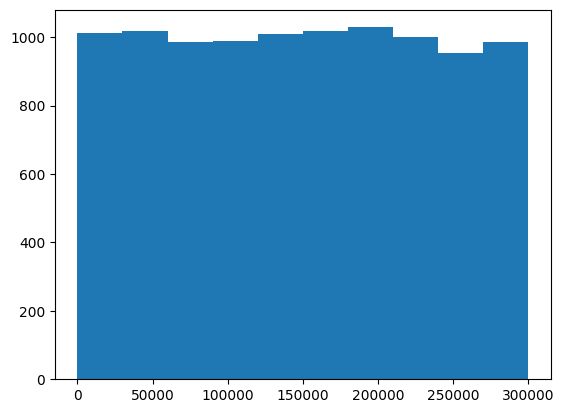

In [28]:
plt.hist(df['Mileage'])

(array([1261.,  775.,  846., 1211.,  880.,  859., 1238.,  858.,  836.,
        1236.]),
 array([2000. , 2002.3, 2004.6, 2006.9, 2009.2, 2011.5, 2013.8, 2016.1,
        2018.4, 2020.7, 2023. ]),
 <BarContainer object of 10 artists>)

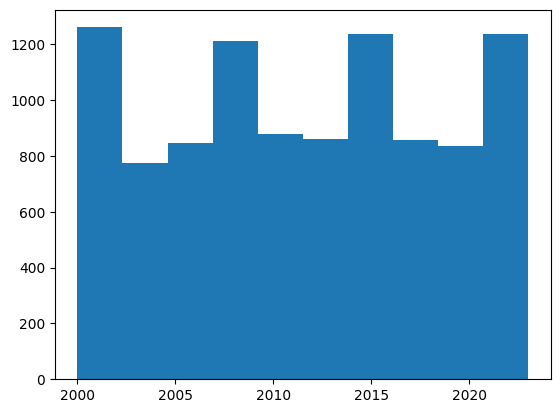

In [27]:
plt.hist(df['Year'])

(array([ 855., 1028.,  973.,  988., 1024., 1236., 1049.,  756.,  995.,
        1096.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

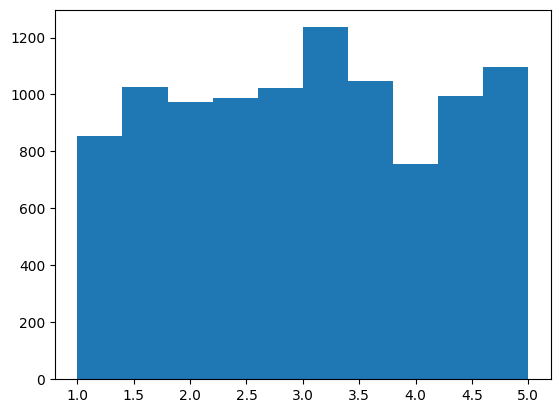

In [35]:
plt.hist(df['Engine_Size'])

(array([ 490.,  873., 1396., 1821., 1939., 1637., 1102.,  536.,  174.,
          32.]),
 array([ 2000. ,  3630.1,  5260.2,  6890.3,  8520.4, 10150.5, 11780.6,
        13410.7, 15040.8, 16670.9, 18301. ]),
 <BarContainer object of 10 artists>)

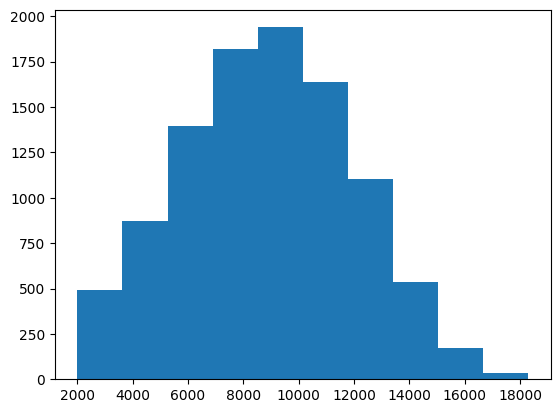

In [18]:
plt.hist(df['Price'])

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = df.copy()
df1[['Year', 'Mileage']] = scaler.fit_transform(df[['Year', 'Mileage']])
print(df1.head())

   Brand  Model      Year  Engine_Size  Fuel_Type  Transmission   Mileage  \
0      6     24  0.869565          4.2          0             1  0.966648   
1      2     19  0.521739          2.0          2             0  0.017775   
2      7     16  0.869565          4.2          0             0  0.771584   
3      0     22  1.000000          2.0          1             1  0.536626   
4      9     17  0.130435          2.6          2             2  0.955558   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  


In [38]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867


In [39]:
df1.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,0.869565,4.2,0,1,0.966648,3,5,8501
1,2,19,0.521739,2.0,2,0,0.017775,2,3,12092
2,7,16,0.869565,4.2,0,0,0.771584,4,2,11171
3,0,22,1.000000,2.0,1,1,0.536626,2,1,11780
4,9,17,0.130435,2.6,2,2,0.955558,3,3,2867


In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1[['Price']] = sc.fit_transform(df1[['Price']])
print(df1.head())

   Brand  Model      Year  Engine_Size  Fuel_Type  Transmission   Mileage  \
0      6     24  0.869565          4.2          0             1  0.966648   
1      2     19  0.521739          2.0          2             0  0.017775   
2      7     16  0.869565          4.2          0             0  0.771584   
3      0     22  1.000000          2.0          1             1  0.536626   
4      9     17  0.130435          2.6          2             2  0.955558   

   Doors  Owner_Count     Price  
0      3            5 -0.113083  
1      2            3  1.040674  
2      4            2  0.744764  
3      2            1  0.940431  
4      3            3 -1.923238  


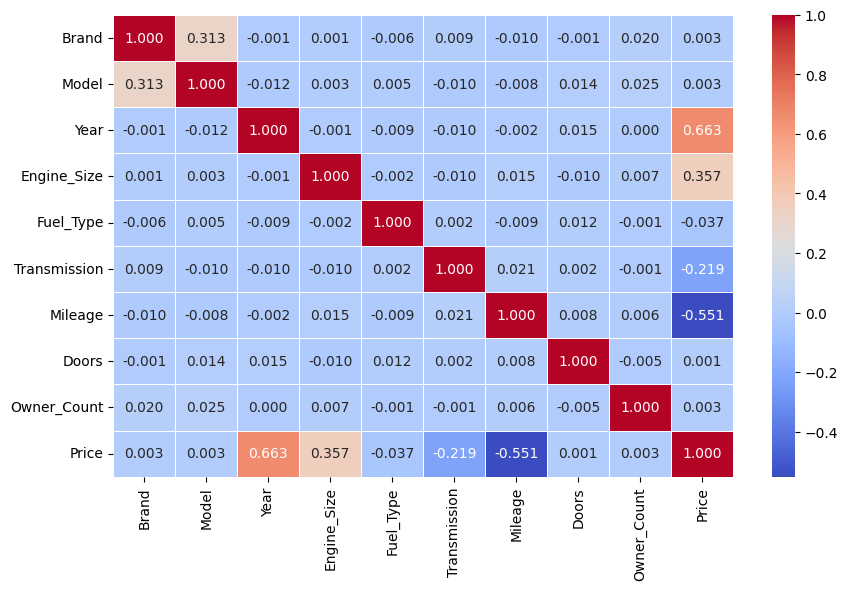

In [51]:
corr_matrix = df1.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True ,cmap = 'coolwarm',fmt = '.3f' ,linewidths = 0.5)
plt.show()

In [52]:
df1.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,0.869565,4.2,0,1,0.966648,3,5,-0.113083
1,2,19,0.521739,2.0,2,0,0.017775,2,3,1.040674
2,7,16,0.869565,4.2,0,0,0.771584,4,2,0.744764
3,0,22,1.000000,2.0,1,1,0.536626,2,1,0.940431
4,9,17,0.130435,2.6,2,2,0.955558,3,3,-1.923238


In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:, :-1], df1.iloc[:,-1], test_size = 0.2, random_state = 42)

In [55]:
x_train.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count
9254,9,17,0.304348,3.2,2,2,0.113106,5,4
1561,1,1,0.434783,4.8,1,2,0.749622,2,1
1670,5,25,0.260870,1.9,2,2,0.044712,3,5
6087,4,6,0.826087,1.7,0,2,0.666243,2,3
6669,7,10,0.217391,3.6,3,0,0.000787,3,2


In [56]:
y_train.head()

9254    0.278892
1561    0.176400
1670   -0.103444
6087   -0.433732
6669    0.591509
Name: Price, dtype: float64

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 9)
(2000, 9)
(8000,)
(2000,)


In [61]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression

In [63]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [64]:
lr.intercept_

-0.8222916115997979

In [65]:
lr.coef_

array([-1.10625375e-04,  5.59322258e-04,  2.20173149e+00,  3.18453394e-01,
       -3.15551167e-02, -2.48294732e-01, -1.91573737e+00, -5.72969430e-04,
        4.83469707e-04])

In [66]:
y_pred = lr.predict(x_test)

In [75]:
r2_lr = r2_score(y_test, y_pred)
r2_lr = round(r2_lr, 3)
print("Linear Regression accuracy is: ", r2_lr)

Linear Regression accuracy is:  0.911


In [96]:
mse_lr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_lr:.4f}")

Mean Squared Error: 0.1149


# Decision Tree

In [91]:
dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [92]:
y_pred = dt.predict(x_test)

r2_dt = r2_score(y_test, y_pred)
r2_dt = round(r2_dt, 3)
print("Decision Tree Regression accuracy is: ", r2_dt)

Decision Tree Regression accuracy is:  0.879


In [93]:
mse_dt = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_dt:.4f}")

Mean Squared Error: 0.1149


# RandomForest Regressor

In [79]:
rf = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)
rf.fit(x_train, y_train)

/home/petpooja--1118/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=42)

In [81]:
y_pred = rf.predict(x_test)

r2_rf = r2_score(y_test, y_pred)
r2_rf = round(r2_rf, 3)
print("Random Forest Regression accuracy is: ", r2_rf)

Random Forest Regression accuracy is:  0.968


In [82]:
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_rf:.4f}")

Mean Squared Error: 0.0300


# Support Vector Regression

In [83]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [84]:
y_pred = svr.predict(x_test)

r2_svr = r2_score(y_test, y_pred)
r2_svr = round(r2_svr, 3)
print("Support Vector Regression accuracy is: ", r2_svr)

Support Vector Regression accuracy is:  0.904


In [94]:
mse_svr = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_svr:.4f}")

Mean Squared Error: 0.1149


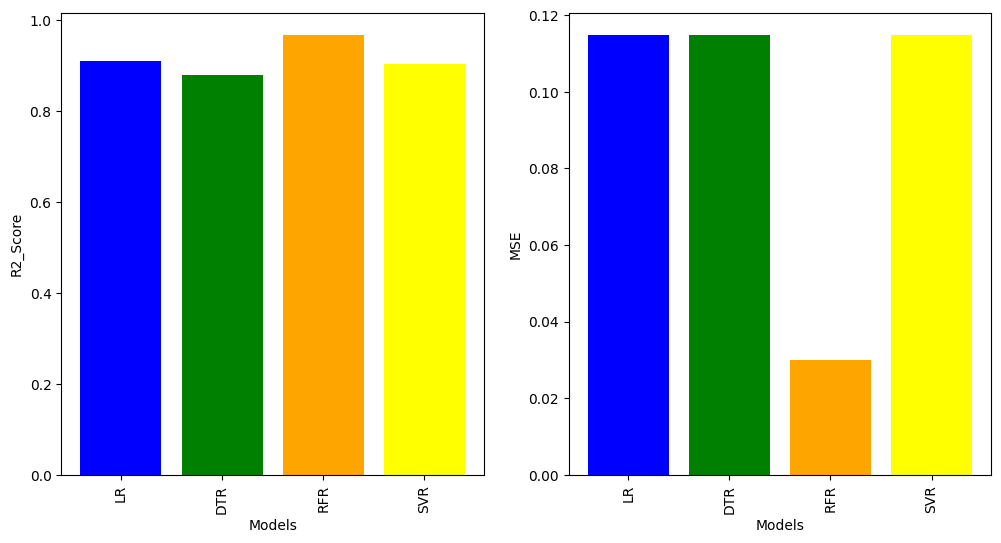

In [120]:
r2 = [r2_lr, r2_dt, r2_rf, r2_svr]
mse = [mse_lr, mse_dt, mse_rf, mse_svr]
models = ['LR', 'DTR', 'RFR', 'SVR']

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.bar(models, r2, color = ['blue', 'green', 'orange', 'yellow'])
plt.xticks(rotation=90)
plt.xlabel("Models")
plt.ylabel("R2_Score")

plt.subplot(1,2,2)
plt.bar(models, mse, color = ['blue', 'green', 'orange', 'yellow'])
plt.xticks(rotation=90)
plt.xlabel("Models")
plt.ylabel("MSE")
plt.show()

In [124]:
array = [5, 25, 0.260870, 1.9, 2, 2 , 0.044712, 3, 5]
y_predict = lr.predict([array])
y_predict

/home/petpooja--1118/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.27409225])

In [127]:
standardize_value = y_predict[0]
standardize_value

-0.27409224535494237

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Price']])
original_price = scaler.inverse_transform([[standardize_value]])
print(round(original_price[0][0],2))

7999.87


In [138]:
df1.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,0.869565,4.2,0,1,0.966648,3,5,-0.113083
1,2,19,0.521739,2.0,2,0,0.017775,2,3,1.040674
2,7,16,0.869565,4.2,0,0,0.771584,4,2,0.744764
3,0,22,1.000000,2.0,1,1,0.536626,2,1,0.940431
4,9,17,0.130435,2.6,2,2,0.955558,3,3,-1.923238


In [143]:
array = [7, 16, 0.869565, 4.2, 0, 0, 0.771584, 4, 2]
y_predict = lr.predict([array])
y_predict

standardize_value = y_predict[0]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Price']])
original_price = scaler.inverse_transform([[standardize_value]])
print(round(original_price[0][0],2))

11836.11


/home/petpooja--1118/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [146]:
#Ans is 0.744764
round(scaler.inverse_transform([[0.744764]])[0][0],2)

11171.0

# Thank you